### Introduction to Machine Learning with Python
## Chapter 2. 지도학습
---
## 커널 서포트벡터 머신 (Kernel SVM)

- 앞에서 선형 SVM 에 대해 배웠습니다. 선형 SVM 은 클래스 간의 간격을 가장 넓게 할 수 있는 곧은 평면을 찾는 것입니다. 하지만 곧은 평면 만으로 클래스를 구분 할 수 없는 경우가 많습니다.
- 커널 방법은 다양한 방법으로 속성을 증가시키거나 다항식이나 복잡한 곡선함수를 적용하여, 굽은 평면으로 클래스를 구분하는 방법입니다.
- 아래에서 동심원 형태의 데이터를 살펴보겠습니다.

- 커널 알고리즘의 핵심은 다양한 속성을 추가해 나가는 것이다.
- 아래는 2차 다항식을 추가하는 경우이다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

(100, 2) [0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0]


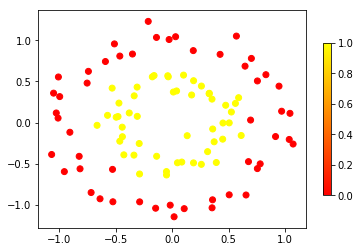

In [30]:
from sklearn.datasets import make_circles

X, y = make_circles(factor=0.5, noise=0.1) # factor = R1/R2, noise: svd
print(X.shape, y)

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

- 위의 그림은 어떤 방식으로도 직선으로 두 클래스를 구분할 수 없습니다.
- 그런데 가만히 보면 중심에서의 거리에 따라 클래스를 구분할 수 있습니다.
- 속성을 하나 추가해 보겠습니다. $ x_1^2 + x_2^2 $ 형태입니다. 

In [3]:
new_col = X[:,0]**2 + X[:,1]**2
X_new = np.c_[X,new_col]

display(X_new.shape, X_new[:5])

(100, 3)

array([[-0.85399136,  0.35284667,  0.85380201],
       [ 0.12470108,  1.24859019,  1.57452782],
       [-0.8523414 , -0.09438089,  0.73539362],
       [-0.72904138, -0.00434132,  0.53152018],
       [ 0.20161545, -0.43340513,  0.2284888 ]])

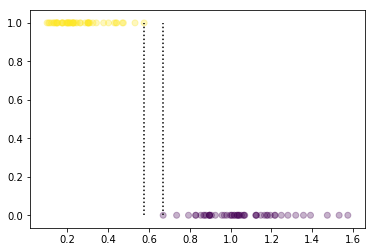

In [14]:
plt.scatter(new_col, y, c=y, alpha=0.3)
plt.vlines([new_col[y==1].max(), new_col[y==0].min()], 0, 1, linestyles='dotted')

In [4]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X, y)

score = model.score(X,y)
display(score)

0.51

In [15]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(new_col.reshape(-1,1), y)

score = model.score(new_col.reshape(-1,1),y)
display(score)

1.0

In [17]:
model.coef_, model.intercept_

(array([[-2.86404942]]), array([1.77010868]))

In [20]:
model.coef_[0,0] / model.intercept_[0]

-1.6180076668228343

In [5]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_new, y)

score = model.score(X_new,y)
display(score)

1.0

In [6]:
model.coef_

array([[-0.18362559,  0.0777891 , -2.8427298 ]])

In [7]:
model.intercept_

array([1.75074802])

C:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


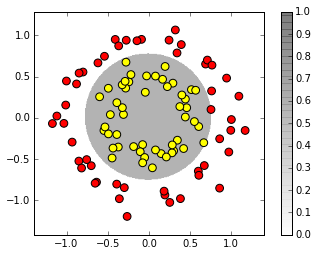

In [11]:
scale = 300
xmax = X[:,0].max()+0.1
xmin = X[:,0].min()-.1
ymax = X[:,1].max()+.1
ymin = X[:,1].min()-.1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
X_grid = np.c_[X_grid, X_grid[:,0]**2 + X_grid[:,1]**2]

pred_y = model.predict(X_grid)

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap='autumn')

plt.colorbar(CS)

<img src="ch02_09.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Support_vector_machine)</p>

(100, 2) [1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1]


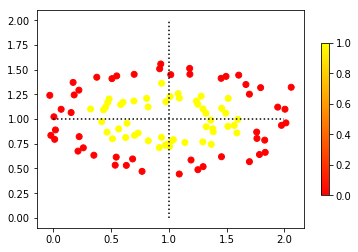

In [49]:
X, y = make_circles(factor=0.5, noise=0.1) # factor = R1/R2, noise: svd
print(X.shape, y)

X = X * [1,0.5]
X = X + 1

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)
plt.vlines([1],-0,2,linestyles='dotted')
plt.hlines([1],-0,2,linestyles='dotted')

In [54]:
X_new = np.c_[X, X[:,0]**2, X[:,1]**2] # x, y, x^2, y^2

model = LinearSVC(C=10)
model.fit(X_new, y)

score = model.score(X_new,y)
display(score)

0.99

In [55]:
model.coef_, model.intercept_

(array([[ 4.67993991, 12.90629922, -2.37778598, -6.51971911]]),
 array([-7.47365336]))

In [56]:
model.coef_/model.coef_[0,2], model.intercept_/model.coef_[0,2]

(array([[-1.96819223, -5.42786412,  1.        ,  2.74192848]]),
 array([3.1431144]))

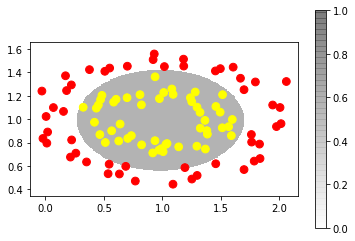

In [57]:
scale = 300
xmax = X_new[:,0].max()+0.1
xmin = X_new[:,0].min()-.1
ymax = X_new[:,1].max()+.1
ymin = X_new[:,1].min()-.1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
X_grid = np.c_[X_grid, X_grid[:,0]**2, X_grid[:,1]**2]

pred_y = model.predict(X_grid)

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap='autumn')

plt.colorbar(CS)

(100, 2) [0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0]


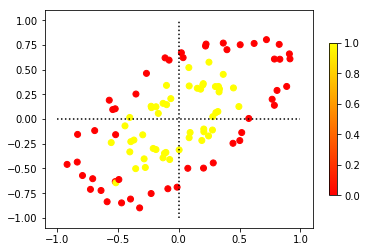

In [68]:
X, y = make_circles(factor=0.5, noise=0.1) # factor = R1/R2, noise: svd
print(X.shape, y)

X = X * [1,0.5]
v = 2**(-0.5)
X = np.dot(X, np.array([[v,v],[-v,v]]))

plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)
plt.vlines([0],-1,1,linestyles='dotted')
plt.hlines([0],-1,1,linestyles='dotted')

In [69]:
X_new = np.c_[X, X[:,0]*X[:,1], X[:,0]**2, X[:,1]**2] # x, y, xy, x^2, y^2

model = LinearSVC(C=10)
model.fit(X_new, y)

score = model.score(X_new,y)
display(score)

0.98

In [70]:
model.coef_, model.intercept_

(array([[ 0.02396328, -0.00882618,  6.63510897, -6.32029238, -5.87797343]]),
 array([1.58752765]))

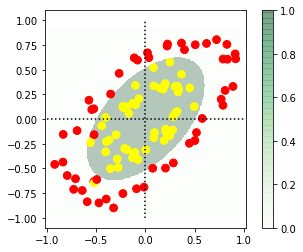

In [74]:
scale = 300
xmax = X_new[:,0].max()+0.1
xmin = X_new[:,0].min()-.1
ymax = X_new[:,1].max()+.1
ymin = X_new[:,1].min()-.1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
X_grid = np.c_[X_grid, X_grid[:,0]*X_grid[:,1], X_grid[:,0]**2, X_grid[:,1]**2]

pred_y = model.predict(X_grid)

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='Greens')

plt.vlines([0],-1,1,linestyles='dotted')
plt.hlines([0],-1,1,linestyles='dotted')
# draw X_train
plt.scatter(X[:,0], X[:,1], c=y, s=60, cmap='autumn')

plt.colorbar(CS)

- 선형 SVM 에서 다루었던 예제를 가지고 커널 SVM 을 적용해 보겠습니다.

In [24]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()

col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정
y = iris.target

# 학습용/테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# 모델 정의
model = SVC(C=10, gamma=1)

# 학습시키기
model.fit(X_train, y_train)

# 평가하기
score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
display(score1, score2)

0.8214285714285714

0.7894736842105263

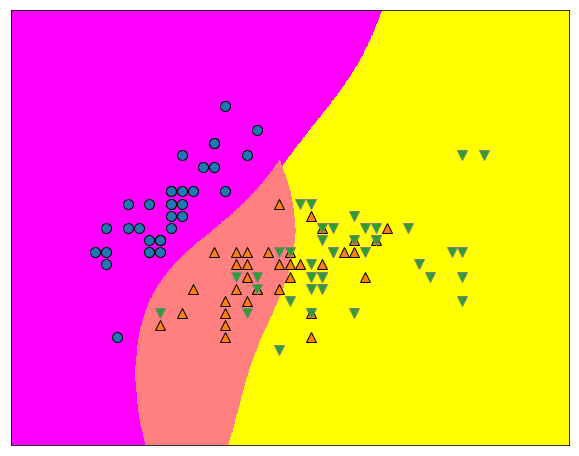

In [25]:
import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, cm='spring')
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

Text(0.5,1,'Kernel SVC - Iris')

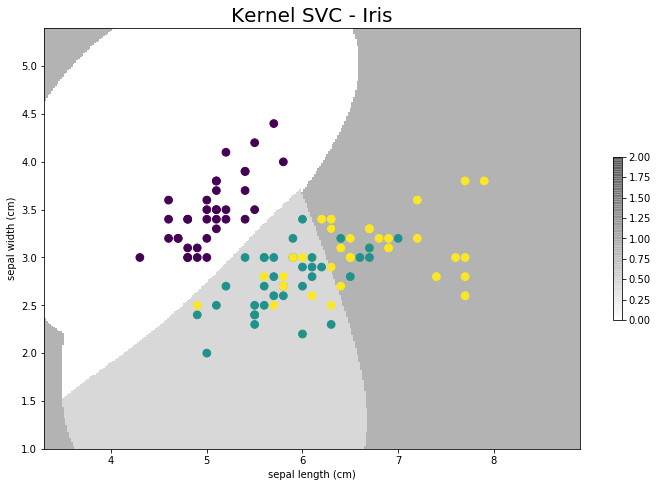

In [5]:
scale = 300
xmax = X_train[:,0].max()+1
xmin = X_train[:,0].min()-1
ymax = X_train[:,1].max()+1
ymin = X_train[:,1].min()-1

xx = np.linspace(xmin,xmax,scale)
yy = np.linspace(ymin,ymax,scale)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
pred_y = model.predict(X_grid)

fig=plt.figure(figsize=[12,10])

CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

# draw X_train
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=60)

plt.xlabel(iris.feature_names[col1])
plt.ylabel(iris.feature_names[col2])
plt.colorbar(CS, shrink=0.3)
plt.title('Kernel SVC - Iris',fontsize=20)

- 결과 그림을 그리는 함수를 정의하고, 이를 이용해 테스트세트를 표시해 보겠습니다.

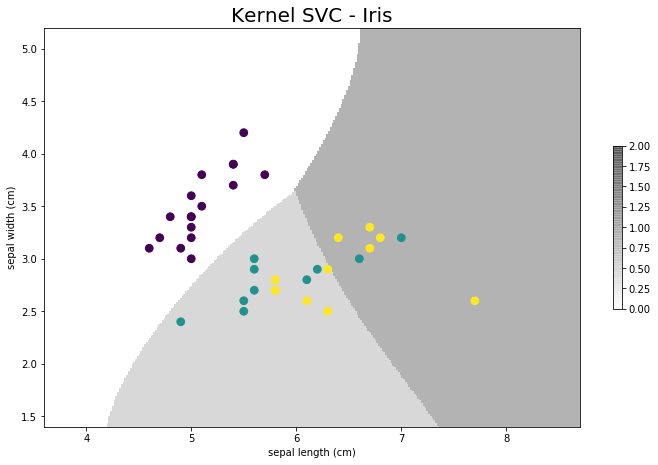

In [24]:
def draw_result_map(X, y, model, cols=['',''], title=''):
    scale = 300
    xmax = X[:,0].max()+1
    xmin = X[:,0].min()-1
    ymax = X[:,1].max()+1
    ymin = X[:,1].min()-1

    xx = np.linspace(xmin,xmax,scale)
    yy = np.linspace(ymin,ymax,scale)
    data1, data2 = np.meshgrid(xx,yy)
    X_grid = np.c_[data1.ravel(), data2.ravel()]
    
    pred_y = model.predict(X_grid)

    fig=plt.figure(figsize=[12,10])

    CS = plt.imshow(pred_y.reshape(scale,scale), interpolation=None, origin='lower',
                    extent=[xmin,xmax,ymin,ymax], alpha=0.3, cmap='gray_r')

    # draw X
    plt.scatter(X[:,0], X[:,1], c=y, s=60)

    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.colorbar(CS, shrink=0.3)
    plt.title(title,fontsize=20)
    
draw_result_map(X_test, y_test, model, [iris.feature_names[col1],iris.feature_names[col2]],'Kernel SVC - Iris')

In [20]:
model

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
help(model)

Help on SVC in module sklearn.svm.classes object:

class SVC(sklearn.svm.base.BaseSVC)
 |  SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float

- SVC 의 옵션 중에서 중요한 것은 **kernel**, **C**, **gamma** 입니다.
```
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |       a callable.
 |       If none is given, 'rbf' will be used. If a callable is given it is
 |       used to pre-compute the kernel matrix from data matrices; that matrix
 |       should be an array of shape ``(n_samples, n_samples)``.
 |  
 |  gamma : float, optional (default='auto')
 |      Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
 |      If gamma is 'auto' then 1/n_features will be used instead.
```

- kernel 은 어떤 알고리즘을 적용할지를 지정하는 것입니다. 기본값인 rbf 는 radial basis function 입니다. (https://en.wikipedia.org/wiki/Radial_basis_function 참고) linear 는 선형 SVM 이고, poly 는 다항식 속성을 추가하는 것입니다.
- C 값은 훈련시 잘못 분류한 점들에 대해 벌점(penalty)을 부여하는 것으로서, C 가 커지면 벌점이 커지므로 최대한 훈련데이터에 맞추려고 노력합니다. 그러므로 C가 커지면 과대적합 경향이 생깁니다.
- gamma 값은 rbf 에서 종모양 형태의 곡면 폭을 지정하는 것입니다. gamma 가 크면 날카로운 종모양이 되므로 훈련데이터를 아주 세밀하게 잘라낼 수 있습니다.
> $ distance = exp(-\gamma \lVert x_1 - x_2 \rVert^2) $

<img src="ch02_10.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Radial_basis_function)</p>